In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Problem 1

In [ ]:
#create a random vector of size 10
size = 10
randvec = np.random.rand(size)
print(randvec)
#What is the maximum value?
maxval = randvec.max()
maxind = randvec.argmin()
#Replace w 0
randvec[maxind] = 0
print(randvec)

## Problem 2

In [5]:
def cart_to_sphere(x,y,z):
    r = np.sqrt( x**2 + y**2 + z**2 )
    phi = np.arctan2(y,x)
    theta = np.arccos(z/r)
    return r,phi,theta

def sphere_to_cart(r,phi,theta):
    x = r * np.sin(theta) * np.cos(phi)
    y = r * np.sin(theta) * np.sin(phi)
    z = r * np.cos(theta)
    return x,y,z

r,phi,theta = cart_to_sphere(3,4,5)
print(r,phi,theta)
print(sphere_to_cart(5,60,30))

7.0710678118654755 0.9272952180016122 0.7853981633974484
(4.705070719233549, 1.5058126650418855, 0.7712572494379202)


## Problem 3

Sketch and pseudocode here --> 
https://drive.google.com/file/d/1__NOsJwpeaf2Jduw2x9MjM3r3nmfuqLD/view?usp=sharing

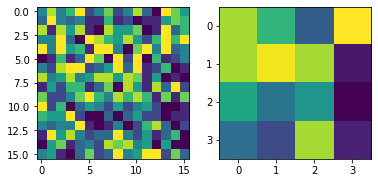

In [2]:
def to_block_sum( array ):
    output = np.zeros( (4,4) ) #4x4 array
    for i in range(4):
        for j in range(4):
            subarray = array[4*i:4*i+4,4*j:4*j+4]
            output[i,j] = subarray.sum()
    return output
array = np.random.randint(0,10, size=(16,16) )
output = to_block_sum(array)

plt.subplot(1,2,1)
plt.imshow( array )
plt.subplot(1,2,2)
plt.imshow( output )

## Problem 4

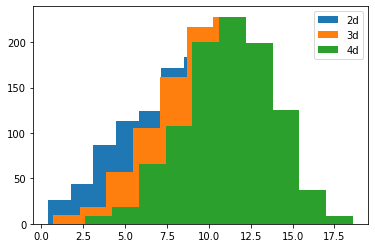

In [9]:
x = np.random.uniform(0,10,1000)
y = np.random.uniform(0,10,1000)
z = np.random.uniform(0,10,1000)
w = np.random.uniform(0,10,1000)

plt.hist( np.sqrt(x**2+y**2) ,label='2d')
plt.hist( np.sqrt(x**2+y**2+z**2) ,label='3d')
plt.hist( np.sqrt(x**2+y**2+z**2+w**2) ,label='4d')
plt.legend();

## Problem 5

In [43]:
#Generate random points
size = int(1_000)
x = np.random.uniform(-1,1,size)
y = np.random.uniform(-1,1,size)

In [53]:
#Choose (arbitrarily) R=0.5. Must be within (-1,1)
R = 0.5

#Count the number of pts <x,y> within the circle R
num_inside = 0
for i in range(x.size):
    if np.sqrt( x[i]**2+y[i]**2 ) <= R:
        num_inside+=1
        
#one line solution with numpy
#(np.hypot(x,y) <= R).sum()
print(num_inside)

182


In [54]:
#Total area (1- -1)**2
A = 2*2
frac = num_inside / x.size
area_circle = A * frac

In [55]:
#Our estimate of pi
print(area_circle/R**2)

2.912


In [56]:
#Make it into a function
def estimate_pi(npts):
    """Estimate pi using npts random numbers.
    Accuracy should improve with larger npts"""
    x = np.random.uniform(-1,1,npts)
    y = np.random.uniform(-1,1,npts)
    R = 0.5
    A = 2 * 2
    #See above. One-line solution instead of looping.
    #Much faster for large npts
    num_inside = np.sum( np.hypot(x,y) <= R )
    frac = num_inside / npts
    acirc = frac * A
    #Return pi estimate
    return acirc / R**2

Text(0, 0.5, 'pi estimate')

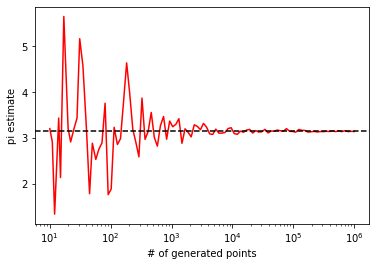

In [62]:
#See how our pi estimate improves with increasing number of generated points

#100 points distributed evenly in log space (10-->10^6)
npts = np.logspace(1,6,100,dtype=int)
pi = np.zeros(npts.size)
for i in range(npts.size):
    pi[i] = estimate_pi(npts[i])
plt.plot(npts,pi,c='red')
plt.xscale('log')
plt.axhline(np.pi,ls='--',c='k')
plt.xlabel('# of generated points')
plt.ylabel('pi estimate')

In [63]:
pi

array([3.2       , 2.90909091, 1.33333333, 3.42857143, 2.13333333,
       5.64705882, 3.2       , 2.90909091, 3.2       , 3.42857143,
       5.16129032, 4.57142857, 3.2       , 1.77777778, 2.88      ,
       2.52631579, 2.75      , 2.88888889, 3.75308642, 1.75824176,
       1.88235294, 3.22807018, 2.85271318, 2.97931034, 3.75308642,
       4.63387978, 3.9804878 , 3.18614719, 2.9034749 , 2.58419244,
       3.86544343, 2.96457766, 3.13801453, 3.55172414, 3.00959693,
       2.81709402, 3.26331811, 3.46414073, 2.9686747 , 3.36480687,
       3.23973257, 3.29251701, 3.41559425, 2.8787062 , 3.1942446 ,
       3.11799253, 3.01901141, 3.28257191, 3.24698795, 3.17532685,
       3.31363772, 3.23060574, 3.08347127, 3.072     , 3.1874063 ,
       3.0990991 , 3.1006831 , 3.11581174, 3.20112981, 3.21843897,
       3.0904682 , 3.07513491, 3.14323725, 3.12020528, 3.16757453,
       3.18264769, 3.1021166 , 3.15623321, 3.12348722, 3.13209771,
       3.18376866, 3.1045024 , 3.14662601, 3.14235183, 3.16736